In [7]:
import pandas as pd 
 
#retrieve HTML data and read it into a dataframe
#This block of code scrapes the data directly from the basket reference website
url="https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
html = pd.read_html(url,header=0)
df2019=html[0] #put into a dataframe called df2019


#Data Cleaning 
raw=df2019.drop(df2019[df2019.Age=='Age'].index) 

#drop all the headers that are redundant (Rk, Player,...PTS is repeated in the df)

raw

#To refer to column, syntax is dataframe.columnName (R is dataframe$columnName)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [29]:
#Check for missing values for each column and sum it
raw.isnull()
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [28]:
#pd.set_option("display.max_rows", None) #view all rows, set to None. 
#pd.set_option("display.max_columns", None) #view more columns but python detects width of terminal and will hide the remining columns
#pd.set_option('display.width', None) #change width of terminal to view all columns

pd.set_option("display.max_rows", 40) #view all rows, set to None. 


#print(raw)


In [19]:
#Dimenson of data 
raw.shape 

(708, 30)

In [20]:
#Take a look at the first few rows
raw.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [21]:
#Take a look at last few rows
raw.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5
733,530,Ivica Zubac,C,21,LAC,26,25,20.2,3.8,7.2,.538,0.0,0.0,NaN,3.8,7.2,.538,.538,1.7,2.3,.733,2.3,5.3,7.7,1.5,0.4,0.9,1.4,2.5,9.4


In [32]:
#Interesting in pandas, columns of the data frame are objects type i.e. strings. We can use df.info() for more info. 
raw.info() #return index of each column, how many non null, dtype

#BECAUSE of HTML so dtype is all strings 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      708 non-null    object
 1   Player  708 non-null    object
 2   Pos     708 non-null    object
 3   Age     708 non-null    object
 4   Tm      708 non-null    object
 5   G       708 non-null    object
 6   GS      708 non-null    object
 7   MP      708 non-null    object
 8   FG      708 non-null    object
 9   FGA     708 non-null    object
 10  FG%     702 non-null    object
 11  3P      708 non-null    object
 12  3PA     708 non-null    object
 13  3P%     661 non-null    object
 14  2P      708 non-null    object
 15  2PA     708 non-null    object
 16  2P%     693 non-null    object
 17  eFG%    702 non-null    object
 18  FT      708 non-null    object
 19  FTA     708 non-null    object
 20  FT%     665 non-null    object
 21  ORB     708 non-null    object
 22  DRB     708 non-null    ob

In [31]:
#Date type of each column
raw.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

In [34]:
#Handeling missing values with 0
df = raw.fillna(0)
#So now no more empty 
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [41]:
#Rk or rank is not useful to our EDA so we drop 
#axis=1 is column wise and axis=0 is row wise

#df=df.drop(['Rk'],axis=1) #keep this but i messed up somewhere
df


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,0,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,0,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,0,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,0,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [42]:
#Write to csv file 
df.to_csv("nba.csv",index=False) #false because we don't want the index i.e 1,2,3...733

In [43]:
ls #oh cool it works as a terminal as well 

Dictionaries and Data Structures.ipynb  Untitled.ipynb
Functions.ipynb                         Variables and If Else.ipynb
List .ipynb                             nba.csv
NBA Basketball EDA.ipynb


In [44]:
cat nba.csv 

Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,.306,0.3,1.2,.261,0.3,0.7,.385,.389,0.2,0.2,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,.300,0.0,0.6,.000,0.4,0.9,.500,.300,0.1,0.3,.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
La

In [46]:
##Exploratory Analysis 
##reload into here
df = pd.read_csv('nba.csv')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,4.0,7.0,0.571,0.571,3.5,4.5,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,3.1,5.6,0.553,0.553,1.6,2.2,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,3.6,6.4,0.559,0.559,1.7,2.1,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,3.4,5.8,0.580,0.580,1.7,2.0,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [47]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  708 non-null    object 
 1   Pos     708 non-null    object 
 2   Age     708 non-null    int64  
 3   Tm      708 non-null    object 
 4   G       708 non-null    int64  
 5   GS      708 non-null    int64  
 6   MP      708 non-null    float64
 7   FG      708 non-null    float64
 8   FGA     708 non-null    float64
 9   FG%     708 non-null    float64
 10  3P      708 non-null    float64
 11  3PA     708 non-null    float64
 12  3P%     708 non-null    float64
 13  2P      708 non-null    float64
 14  2PA     708 non-null    float64
 15  2P%     708 non-null    float64
 16  eFG%    708 non-null    float64
 17  FT      708 non-null    float64
 18  FTA     708 non-null    float64
 19  FT%     708 non-null    float64
 20  ORB     708 non-null    float64
 21  DRB     708 non-null    float64
 22  TR

In [49]:
#Show specfic data types in a data frame
df.select_dtypes(include=['number']) #number includes floats and ints

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,4.0,7.0,0.571,0.571,3.5,4.5,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,3.1,5.6,0.553,0.553,1.6,2.2,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,3.6,6.4,0.559,0.559,1.7,2.1,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,3.4,5.8,0.580,0.580,1.7,2.0,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [50]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Álex Abrines,SG,OKC
1,Quincy Acy,PF,PHO
2,Jaylen Adams,PG,ATL
3,Steven Adams,C,OKC
4,Bam Adebayo,C,MIA
...,...,...,...
703,Tyler Zeller,C,MEM
704,Ante Žižić,C,CLE
705,Ivica Zubac,C,TOT
706,Ivica Zubac,C,LAL


In [66]:
#Questions 
#In performing exploratory analysis, it is important to be able to select subsets of data to perform analysis for comparisions

df.PTS.max() 

36.1

In [67]:
df['PTS'].max()

36.1

In [68]:
#Which player scored the most points (PTS) per game. Here we return the entire row 
df[df.PTS == df.PTS.max()] #this returns a new data frame so we can work with it


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [72]:
#What team does James Harden play for? 
df1=df[['Player','Tm']]
df1[df1.Player=='James Harden']

#Using line 68
PlayerMostPoints = df[df.PTS == df.PTS.max()]

In [73]:
PlayerMostPoints.Tm

267    HOU
Name: Tm, dtype: object

In [75]:
#Which position is player playing as? 
PlayerMostPoints.Pos

267    PG
Name: Pos, dtype: object

In [76]:
#Which player scored more than 20 Points per game? 
df[df.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,0.475,2.5,7.3,0.351,6.8,12.4,0.548,0.540,4.4,5.5,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,2.1,6.5,0.326,7.0,13.1,0.536,0.521,6.1,7.1,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
103,Jimmy Butler,SG,29,MIN,10,10,36.1,7.4,15.7,0.471,1.7,4.5,0.378,5.7,11.2,0.509,0.525,4.8,6.1,0.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
143,Mike Conley,PG,31,MEM,70,70,33.5,7.0,16.0,0.438,2.2,6.1,0.364,4.8,9.9,0.483,0.507,4.9,5.8,0.845,0.6,2.8,3.4,6.4,1.3,0.3,1.9,1.8,21.1
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,5.1,11.7,0.437,4.0,7.7,0.525,0.604,3.8,4.2,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,0.9,2.6,0.331,8.6,15.7,0.547,0.540,6.1,7.7,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
174,DeMar DeRozan,SG,29,SAS,77,77,34.9,8.2,17.1,0.481,0.1,0.6,0.156,8.1,16.5,0.492,0.483,4.8,5.7,0.830,0.7,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2
181,Luka Dončić,SG,19,DAL,72,72,32.2,7.0,16.5,0.427,2.3,7.1,0.327,4.7,9.3,0.503,0.497,4.8,6.7,0.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2


In [80]:
#Which player had the higehst 3-Point Field Goals Per Game (3P)? 
df[df['3P'] == df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,5.1,11.7,0.437,4.0,7.7,0.525,0.604,3.8,4.2,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


In [83]:
#Which player had the highest AST? 
df[df.AST == df.AST.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,1.6,5.6,0.29,7.0,14.5,0.481,0.468,4.1,6.2,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


In [93]:
###Group By Function 
#Which player scored the highest PTS in Los Angles Lakers? 
grouping = df.groupby(by='Tm').get_group('LAL')
grouping

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
35,Lonzo Ball,PG,21,LAL,47,45,30.3,3.9,9.7,0.406,1.6,4.9,0.329,2.3,4.9,0.482,0.488,0.4,1.0,0.417,1.1,4.2,5.3,5.4,1.5,0.4,2.2,2.4,9.9
49,Michael Beasley,PF,30,LAL,26,2,10.7,2.9,5.9,0.490,0.1,0.7,0.176,2.8,5.2,0.529,0.500,1.1,1.5,0.718,0.5,1.8,2.3,1.0,0.3,0.4,1.0,1.6,7.0
67,Isaac Bonga,PG,19,LAL,22,0,5.5,0.2,1.5,0.152,0.0,0.4,0.000,0.2,1.1,0.200,0.152,0.4,0.7,0.600,0.4,0.7,1.1,0.7,0.4,0.2,0.3,0.4,0.9
93,Reggie Bullock,SG,27,LAL,19,16,27.6,3.3,8.1,0.412,1.8,5.2,0.343,1.5,2.8,0.537,0.523,0.9,1.1,0.810,0.1,2.5,2.6,1.1,0.8,0.4,0.6,1.6,9.3
107,Kentavious Caldwell-Pope,SG,25,LAL,82,23,24.8,4.0,9.2,0.430,1.8,5.3,0.347,2.1,3.9,0.542,0.530,1.7,1.9,0.867,0.6,2.3,2.9,1.3,0.9,0.2,0.8,1.7,11.4
120,Alex Caruso,PG,24,LAL,25,4,21.2,3.1,6.9,0.445,1.0,2.0,0.480,2.1,4.9,0.431,0.514,2.0,2.6,0.797,0.8,1.9,2.7,3.1,1.0,0.4,1.7,2.2,9.2
127,Tyson Chandler,C,36,LAL,48,6,16.4,1.1,1.8,0.609,0.0,0.0,0.000,1.1,1.8,0.616,0.609,0.9,1.4,0.594,1.8,3.8,5.6,0.6,0.4,0.5,0.7,1.9,3.1
281,Josh Hart,SG,23,LAL,67,22,25.6,2.8,6.9,0.407,1.4,4.1,0.336,1.4,2.8,0.511,0.506,0.8,1.2,0.688,0.5,3.2,3.7,1.4,1.0,0.6,0.9,2.2,7.8
319,Andre Ingram,SG,33,LAL,4,0,3.8,0.0,1.5,0.000,0.0,0.8,0.000,0.0,0.8,0.000,0.000,0.0,0.0,0.000,0.3,0.3,0.5,0.0,0.3,0.0,0.3,0.0,0.0
320,Brandon Ingram,SF,21,LAL,52,52,33.8,7.0,14.0,0.497,0.6,1.8,0.330,6.4,12.2,0.521,0.518,3.8,5.6,0.675,0.8,4.3,5.1,3.0,0.5,0.6,2.5,2.9,18.3


In [94]:
sizeTeam = df.groupby(by='Tm').size()
sizeTeam

Tm
ATL    22
BOS    17
BRK    19
CHI    22
CHO    17
CLE    27
DAL    21
DEN    18
DET    20
GSW    17
HOU    23
IND    17
LAC    22
LAL    22
MEM    28
MIA    18
MIL    24
MIN    21
NOP    20
NYK    23
OKC    18
ORL    17
PHI    26
PHO    24
POR    18
SAC    20
SAS    16
TOR    22
TOT    86
UTA    18
WAS    25
dtype: int64

In [98]:
#Of the 5 positions, which position scores the most point? 
#First group positions 
groupPG = df.groupby(by='Pos').PTS.describe() #provides descriptive stats for each column or data frame df.describe()
groupPG

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
C-PF,1.0,5.000000,NaN,5.0,5.000,5.00,5.000,5.0
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PF-C,1.0,3.300000,NaN,3.3,3.300,3.30,3.300,3.3
PF-SF,2.0,11.200000,7.353911,6.0,8.600,11.20,13.800,16.4
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,119.0,8.273950,5.958080,0.0,4.200,6.70,11.700,28.0
SF-SG,2.0,15.450000,4.596194,12.2,13.825,15.45,17.075,18.7
SG,175.0,8.476000,5.710476,0.0,4.000,7.60,11.250,26.6


In [108]:
 # We will now show only the 5 traditional positions (those have combo positions will be removed")
df.Pos.isin(['C','PF','PG','SF','SG']) #returns True/False 
df[df.Pos.isin(['C','PF','PG','SF','SG'])] #return rows 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,4.0,7.0,0.571,0.571,3.5,4.5,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,3.1,5.6,0.553,0.553,1.6,2.2,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,3.6,6.4,0.559,0.559,1.7,2.1,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,3.4,5.8,0.580,0.580,1.7,2.0,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [118]:
#Of the 5 positions, which position scores the most point (PTS? 
df[df.Pos.isin(['C','PF','PG','SF','SG'])].groupby('Pos').describe().PTS['max']

Pos
C     27.5
PF    27.7
PG    36.1
SF    28.0
SG    26.6
Name: max, dtype: float64

In [129]:
#Some Plots 
#Histograms
#Of the 5 positions, which position scores the most point (PTS)?
df1 = df[['Pos','PTS']] 

#Now we only want those 5 positions
new_df = df1[df1['Pos'].isin(['C','PF','PG','SF','SG'])]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     700 non-null    object 
 1   PTS     700 non-null    float64
dtypes: float64(1), object(1)
memory usage: 16.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3affa9bb0>,
      dtype=object)

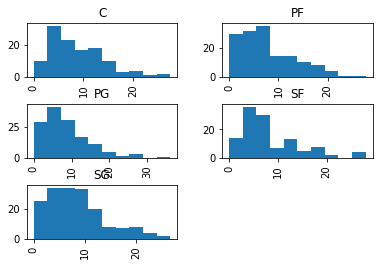

In [137]:
#Pandas built in Viz 
new_df['PTS'].hist(by=new_df['Pos']) #this way good for grouped data 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3ac77a190>,
      dtype=object)

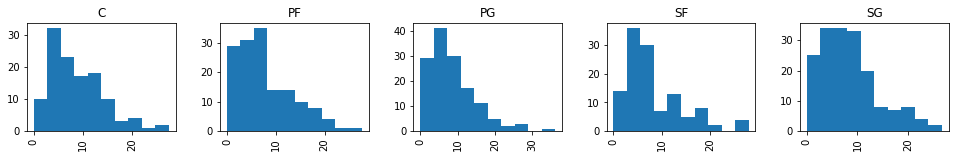

In [140]:
new_df['PTS'].hist(by=new_df['Pos'], layout=(1,5),figsize=(16,2))

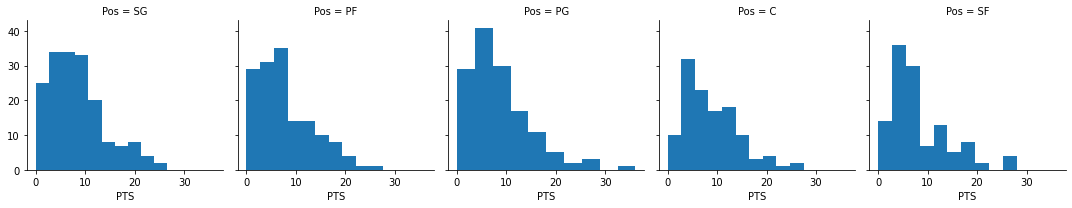

In [144]:
#Seaborn Viz
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.FacetGrid(new_df,col="Pos")
g.map(plt.hist,"PTS");


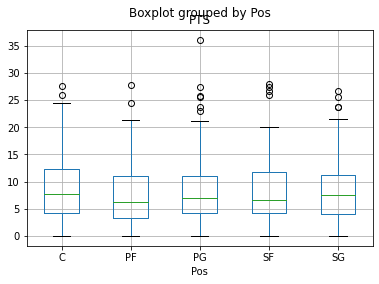

In [145]:
new_df.boxplot(column='PTS', by='Pos')

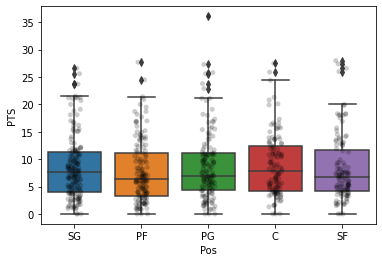

In [151]:
import seaborn as sns 
sns.boxplot(x='Pos',y='PTS', data=new_df)
sns.stripplot(x='Pos',y='PTS', data=new_df,
             jitter=True,
             marker='o',
             alpha=0.2,
             color='black')